In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [24]:
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(5, 5), facecolor='white')  # low dpi (dots per inch) yields small inline figures

## PAGA with enterocytes reordered and EEC merged

In [34]:
# Importing dataset
data = sc.read_h5ad('epithelia_v3.h5ad')
data

C:\Users\nvrib\anaconda3\lib\site-packages\anndata\compat\__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 10730 × 3000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'percent.mt', 'lane', 'SCT_snn_res.0.4', 'seurat_clusters', 'genotype', 'sample', 'droplet', 'status', 'marsh', 'sex', 'age', 'batch', 'barcode', 'cell.type.1', 'cell.type.2', 'SCT_snn_res.0.7', 'SCT_snn_res.0.6', 'SCT_snn_res.0.65', 'SCT_snn_res.0.8', 'cell.type.3', 'cell.type.4'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'HARMONY', 'PCs'
    obsp: 'distances'

In [36]:
# Spliting into control and CeD
control = data[data.obs['status'] == 'Ctrl']
ced = data[data.obs['status'] == 'CeD']

In [37]:
# Calculating neighbors
sc.pp.neighbors(control, n_neighbors = 20, use_rep = 'X_pca', n_pcs = 50)
sc.pp.neighbors(ced, n_neighbors = 20, use_rep = 'X_pca', n_pcs = 50)

C:\Users\nvrib\AppData\Local\Temp\ipykernel_12992\479580056.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sc.pp.neighbors(control, n_neighbors = 20, use_rep = 'X_pca', n_pcs = 50)
C:\Users\nvrib\AppData\Local\Temp\ipykernel_12992\479580056.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sc.pp.neighbors(ced, n_neighbors = 20, use_rep = 'X_pca', n_pcs = 50)


In [38]:
# Running PAGA
sc.tl.paga(control, groups = 'cell.type.4')
sc.tl.paga(ced, groups = 'cell.type.4')

In [50]:
print(control.uns['paga']['connectivities_tree'])

  (0, 9)	0.1967202873652975
  (2, 3)	0.5786697208957018
  (2, 11)	0.511592824500987
  (3, 4)	0.43836943791052674
  (5, 4)	1.0
  (6, 4)	0.6028902163548792
  (7, 1)	1.0
  (7, 9)	0.4709287086895409
  (8, 9)	0.6011160763015992
  (11, 9)	0.7111745129633086
  (11, 12)	0.7416411573022612
  (12, 10)	0.5614788877946773
  (13, 0)	0.07302388813361817


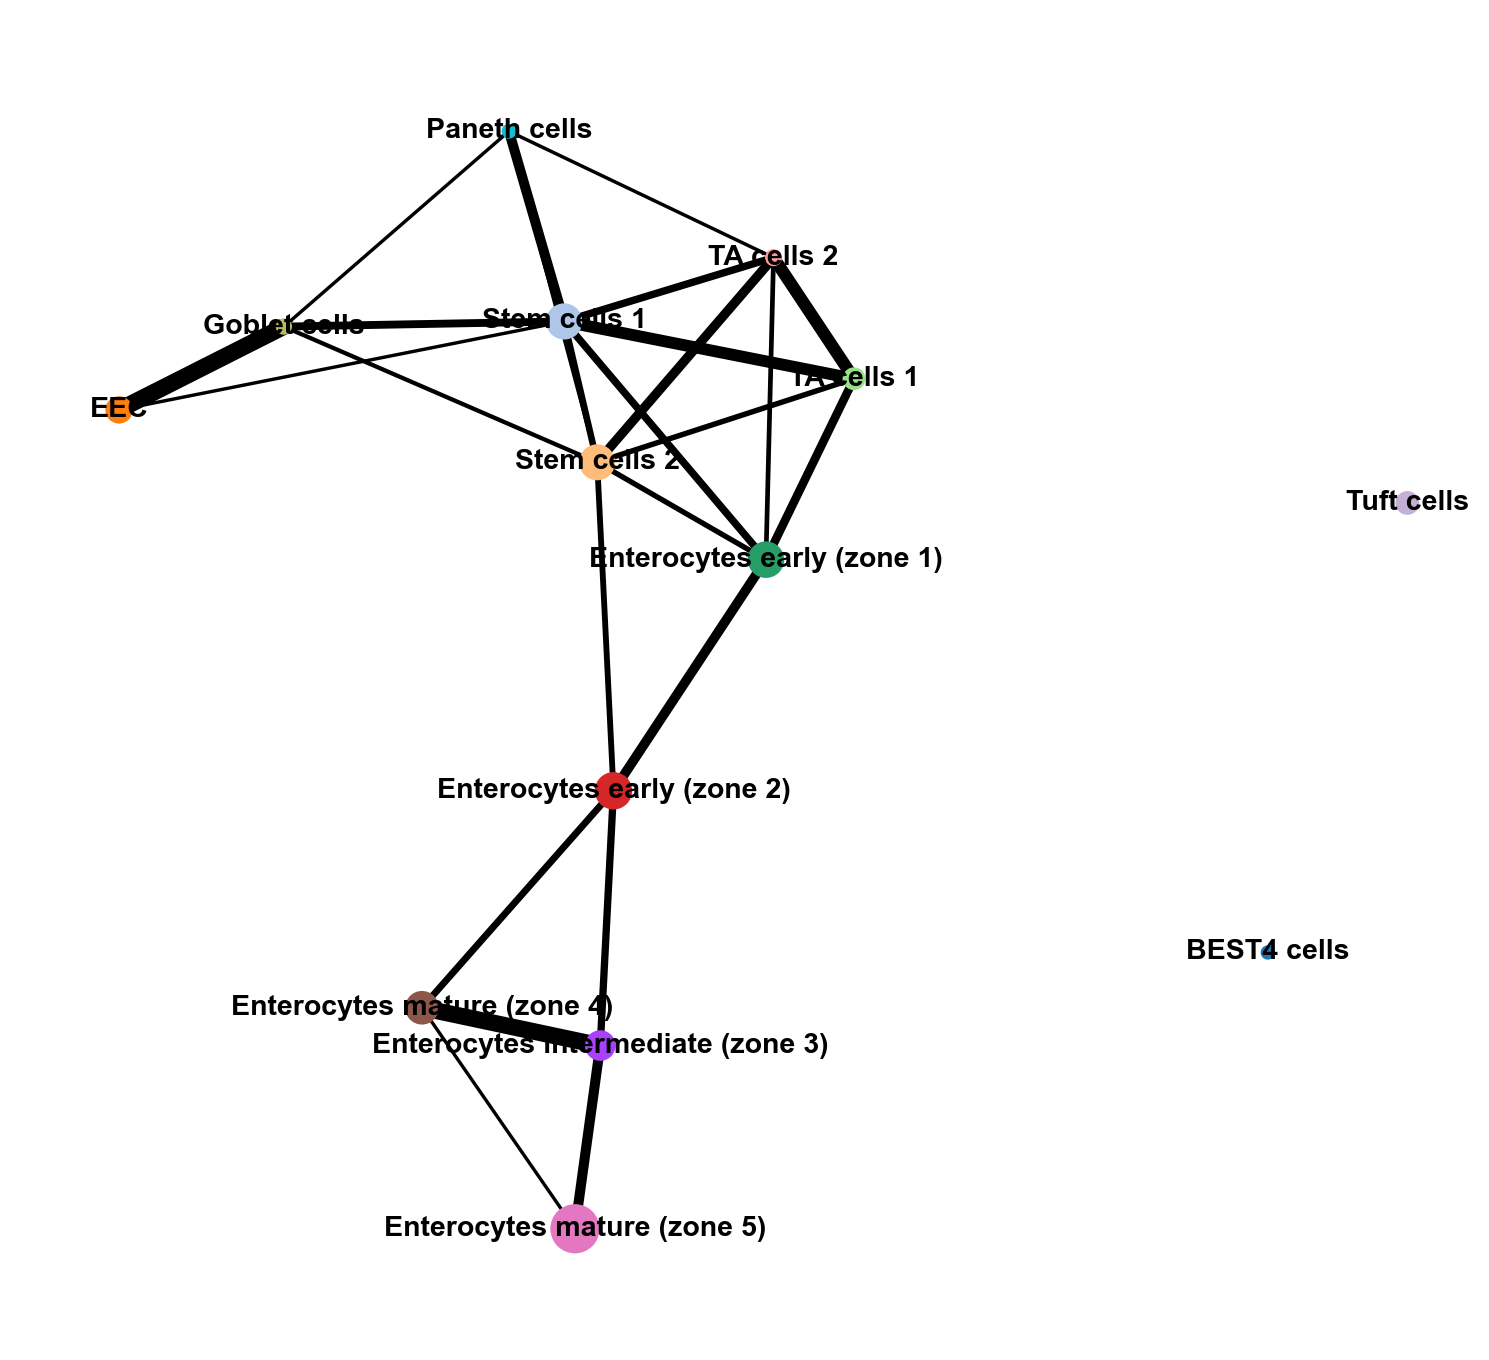

In [89]:
# Plotting PAGA - control
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(10, 10), facecolor='white')
sc.pl.paga(control, layout = 'fr', threshold = 0.2, node_size_power = 1)

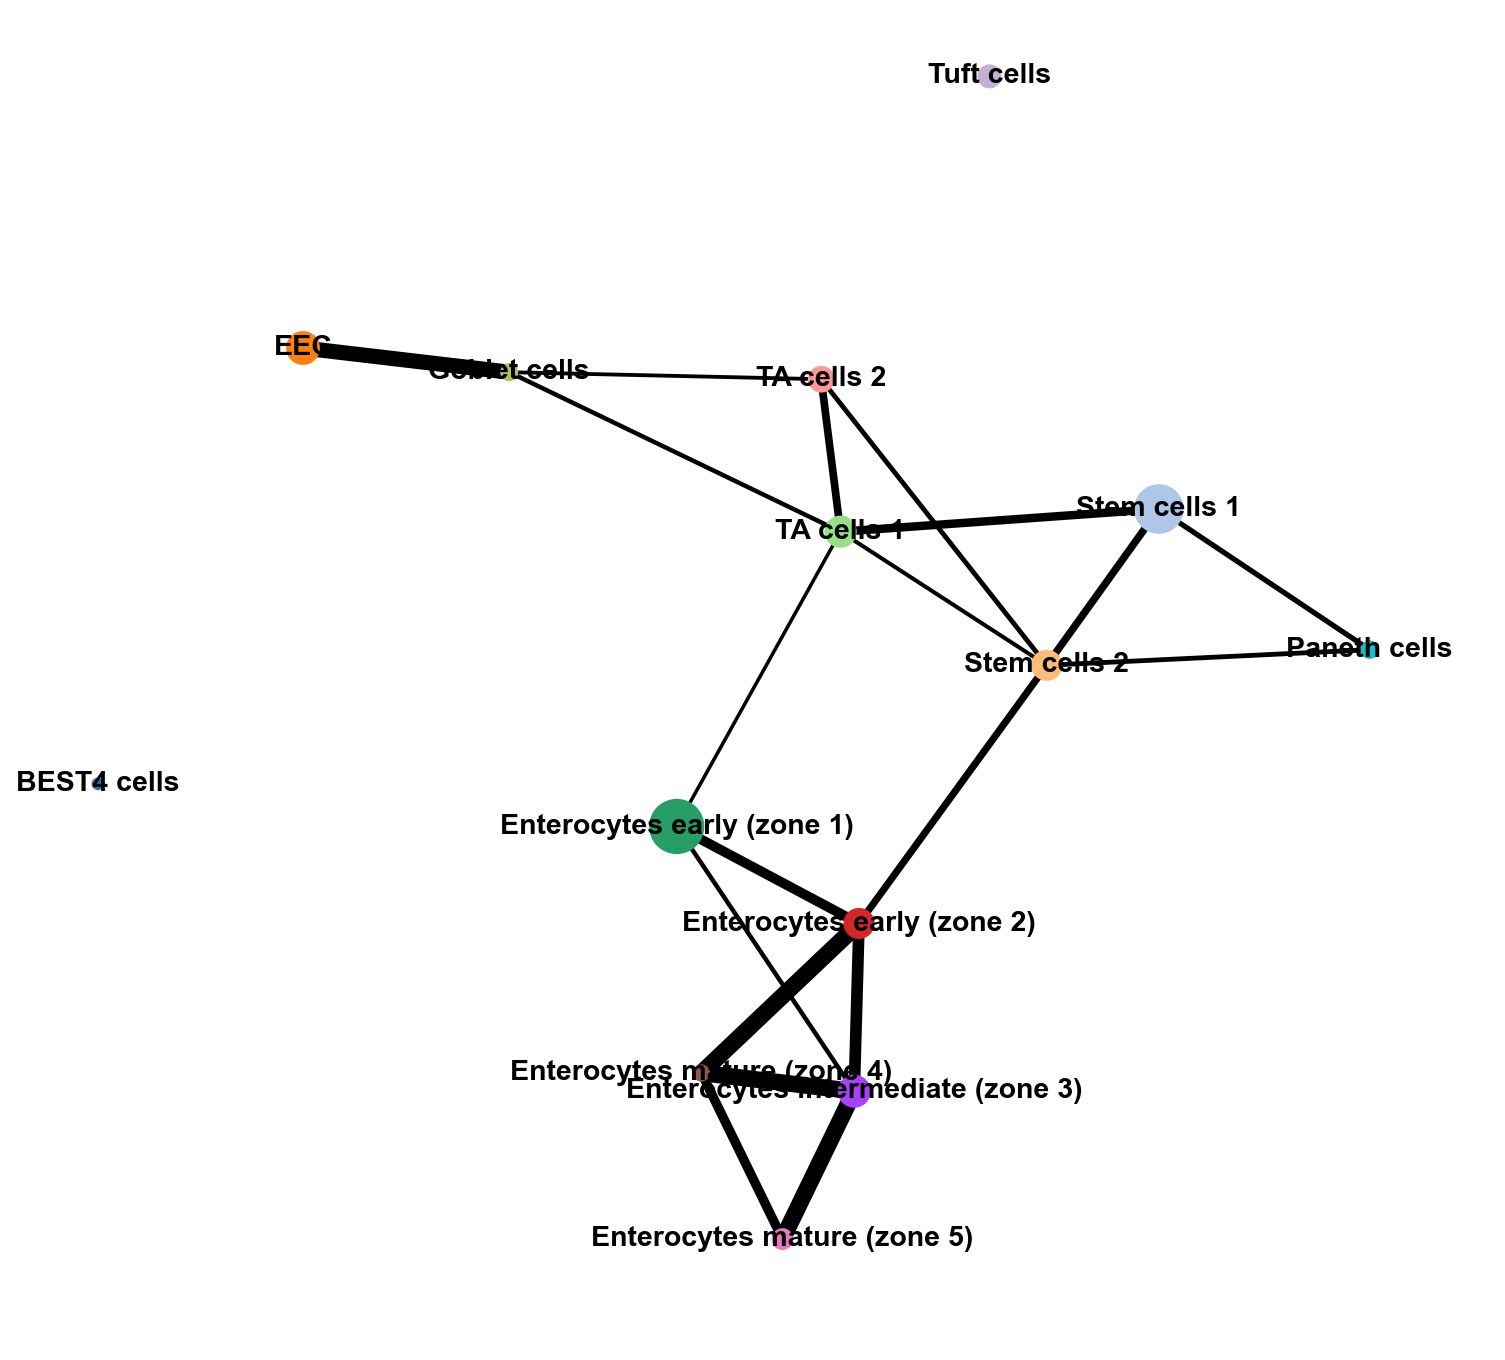

In [90]:
# Plotting PAGA - CeD
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(10, 10), facecolor='white')
sc.pl.paga(ced, layout = 'fr', threshold = 0.2,node_size_power = 1)